In [36]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

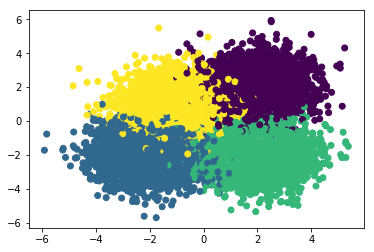

In [37]:

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-1,1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

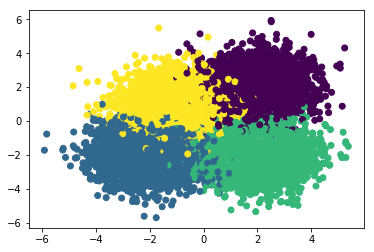

In [45]:

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-1,1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [46]:
X

array([[ 2.67854965, -3.87486566],
       [ 1.80541534, -1.96612945],
       [-2.59081835, -0.75495899],
       ..., 
       [ 3.27465312, -1.07527819],
       [ 0.55614518, -0.29618095],
       [-1.14101572,  1.47626502]])

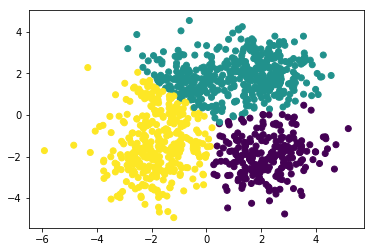

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        6    6  224    3
1      267    1    3  147
2        0  232   11  100


In [38]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=47).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


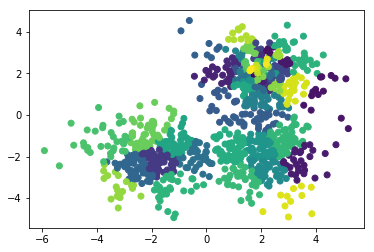

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  83  84  85  86  87  88  89  \
row_0                                         ...                               
0       1   1   2   1   6  11   8   0   3  22 ...   1   1   1  25   0   1   2   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   3   0  30   0   0 ...   0   0   0   0  11   0   0   

col_0  90  91  92  
row_0              
0       1   1   1  
1       0   0   0  
2       0   0   0  

[3 rows x 93 columns]


In [30]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

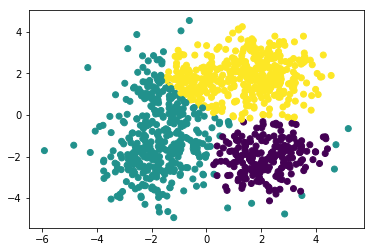

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    3  270
1        5  233    1
2      209   21    8
3        1  134  115


In [30]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [4]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 29


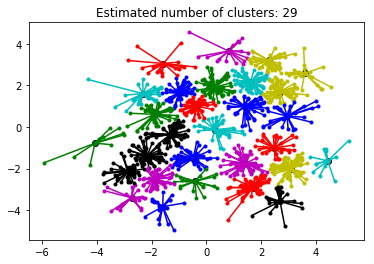

In [5]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [9]:
X_train

array([[ 2.54975122, -1.83738438],
       [ 0.71169238,  2.29271548],
       [-1.66494565, -1.43521089],
       ..., 
       [ 3.18759182, -2.14968095],
       [ 1.02834327,  0.62038184],
       [ 2.08531814,  1.19173428]])

In [28]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

def run_clustering(x_input,y_input,n):
    
    X=x_input
    y=y_input

    fig = plt.figure(figsize=(20,20))

    plt.subplot(3,2,1)
    plt.title("Data")
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    X=x_input
    y=y_input

    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)



    plt.subplot(3,2,2)
    # Calculate predicted values.
    y_pred_k = KMeans(n_clusters=n, random_state=47).fit_predict(X_train)

    # Plot the solution.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_k)
    plt.title("K Means")

    #Spectral Clustering

    # We know we're looking for three clusters.
    #n_clusters=n

    # Declare and fit the model.
    sc = SpectralClustering()
    sc.fit(X_train)

    #Predicted clusters.
    predict_sc=sc.fit_predict(X_train)

    #Graph results.
    plt.subplot(3,2,3)
    plt.title("Spectral Clustering")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_sc)


    ## Mean Shift
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.

    plt.subplot(3,2,4)
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    plt.title("Mean Shift Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)

    plt.subplot(3,2,5)

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Affinity Estimated number of clusters: {}'.format(n_clusters_))

    plt.subplots_adjust(bottom = .2 , wspace = .3, hspace = .3, left= .125, right= .9)


    plt.show()


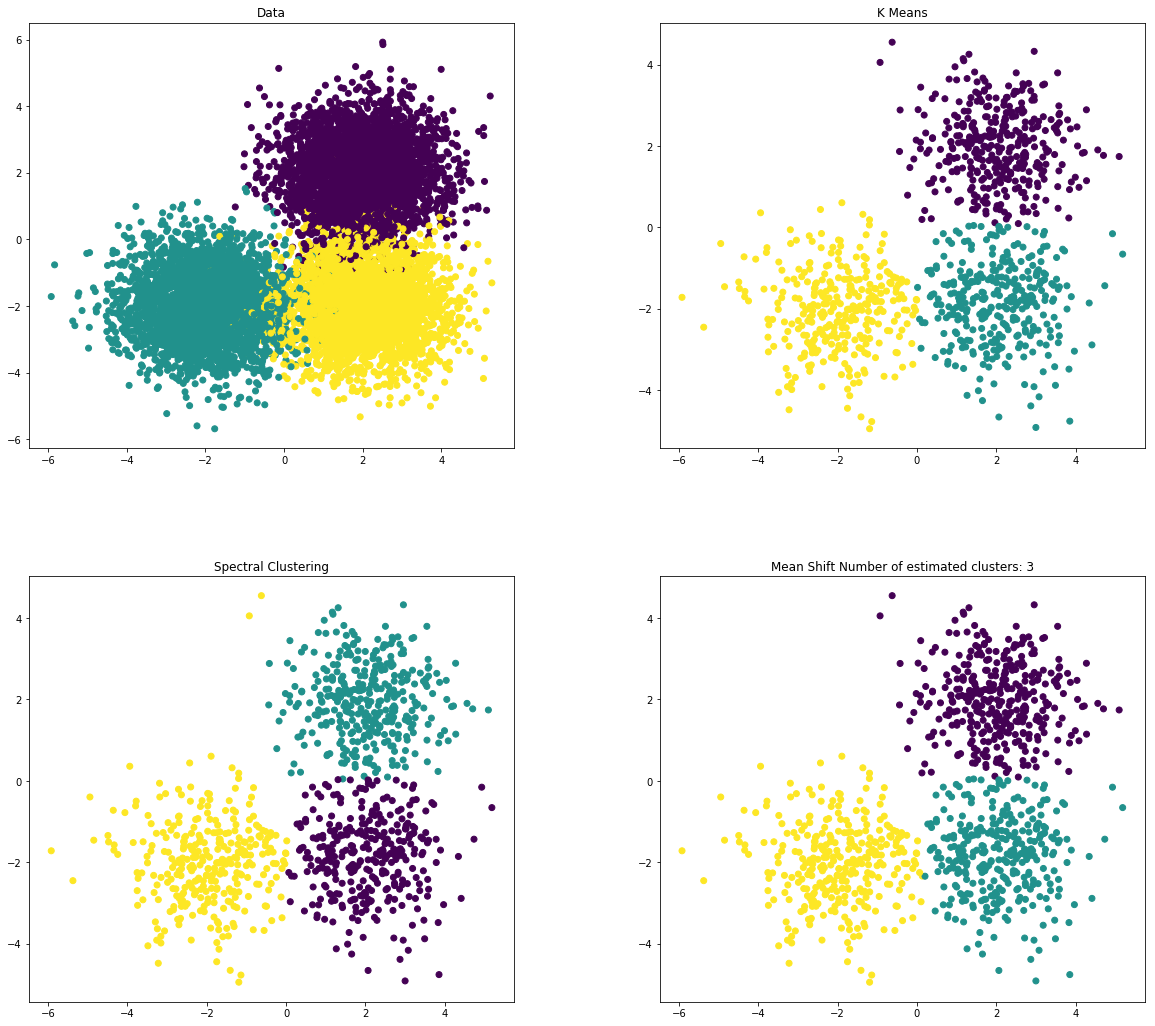

In [68]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

fig = plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Data")
plt.scatter(X[:, 0], X[:, 1], c=y)

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)



plt.subplot(2,2,2)
# Calculate predicted values.
y_pred_k = KMeans(n_clusters=3, random_state=47).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_k)
plt.title("K Means")

#Spectral Clustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict_sc=sc.fit_predict(X_train)

#Graph results.
plt.subplot(2,2,3)
plt.title("Spectral Clustering")
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_sc)

plt.subplot(2,2,4)
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

plt.title("Mean Shift Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)

plt.subplots_adjust(bottom = .2 , wspace = .3, hspace = .3, left= .125, right= .9)


plt.show()


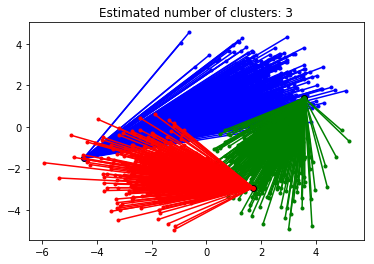

In [69]:

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [ ]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run 

### Original

Done


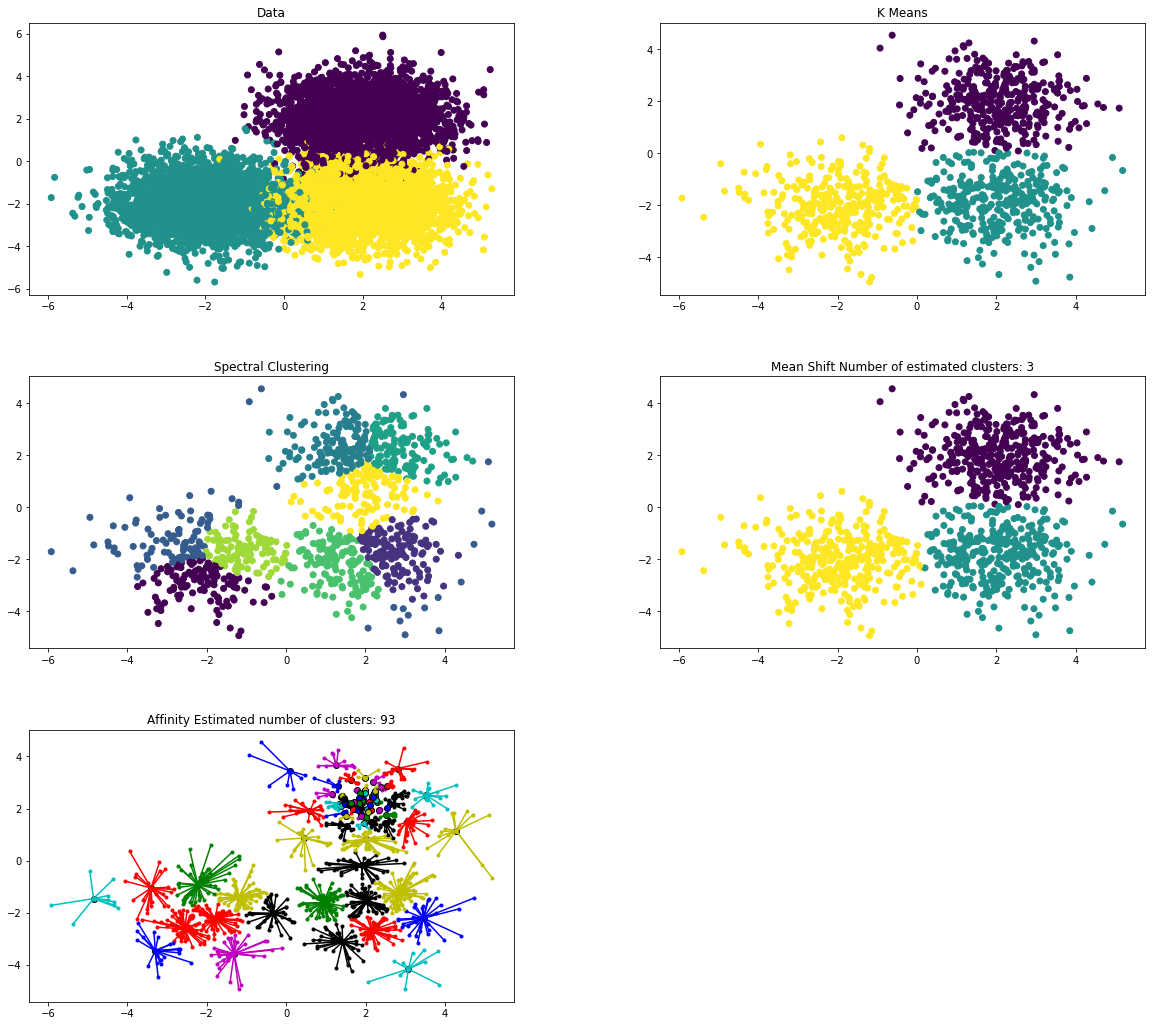

In [29]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run_clustering(X,y,3)

### Increase distance between by moving centers .5

Done


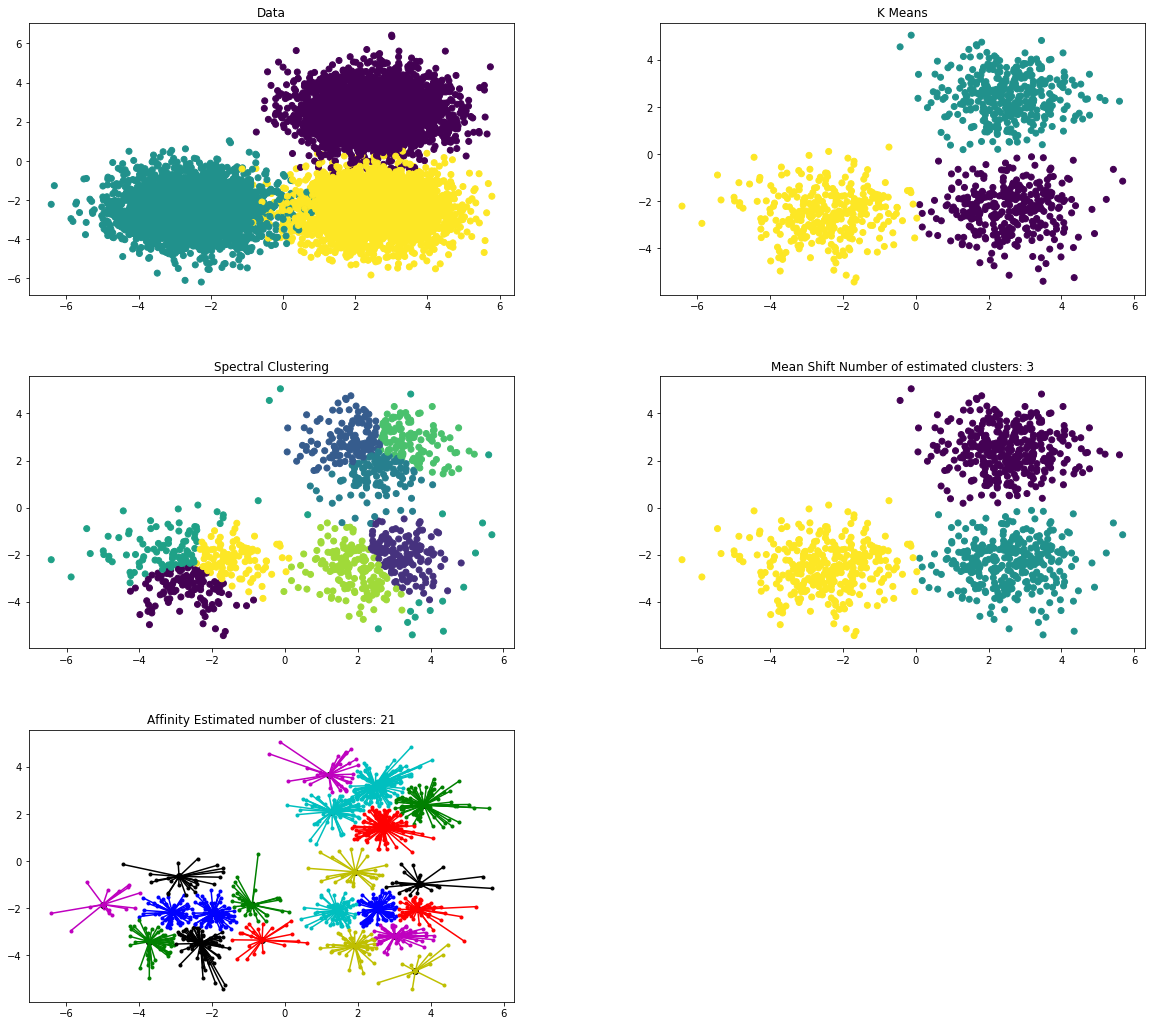

In [30]:
# The coordinates of the centers of our blobs.
centers = [[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run_clustering(X,y,3)

### Add a fourth blob on the edge

Done


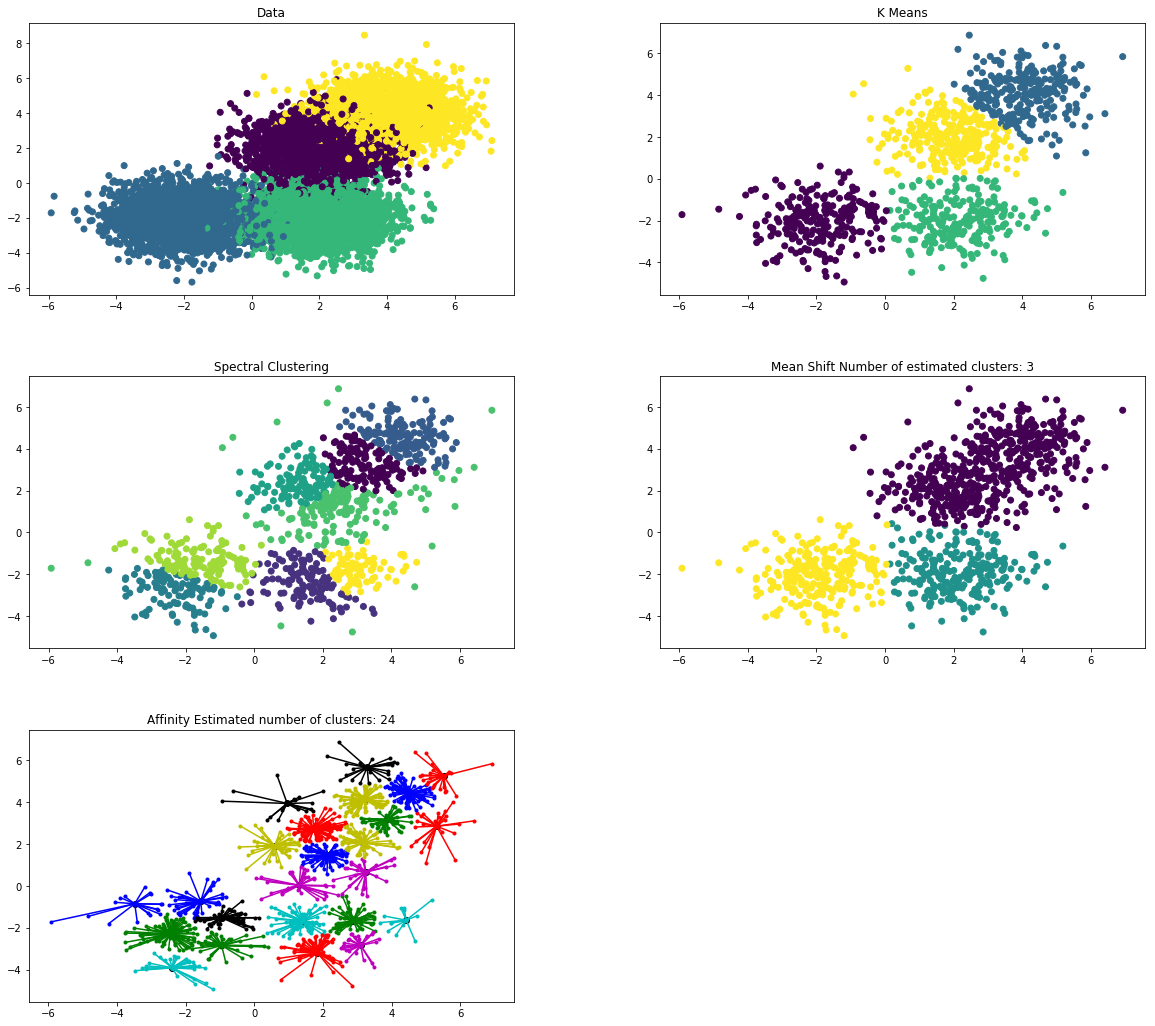

In [31]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [4,4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run_clustering(X,y,4)

### Move farther apart and add a fourth blob

Done


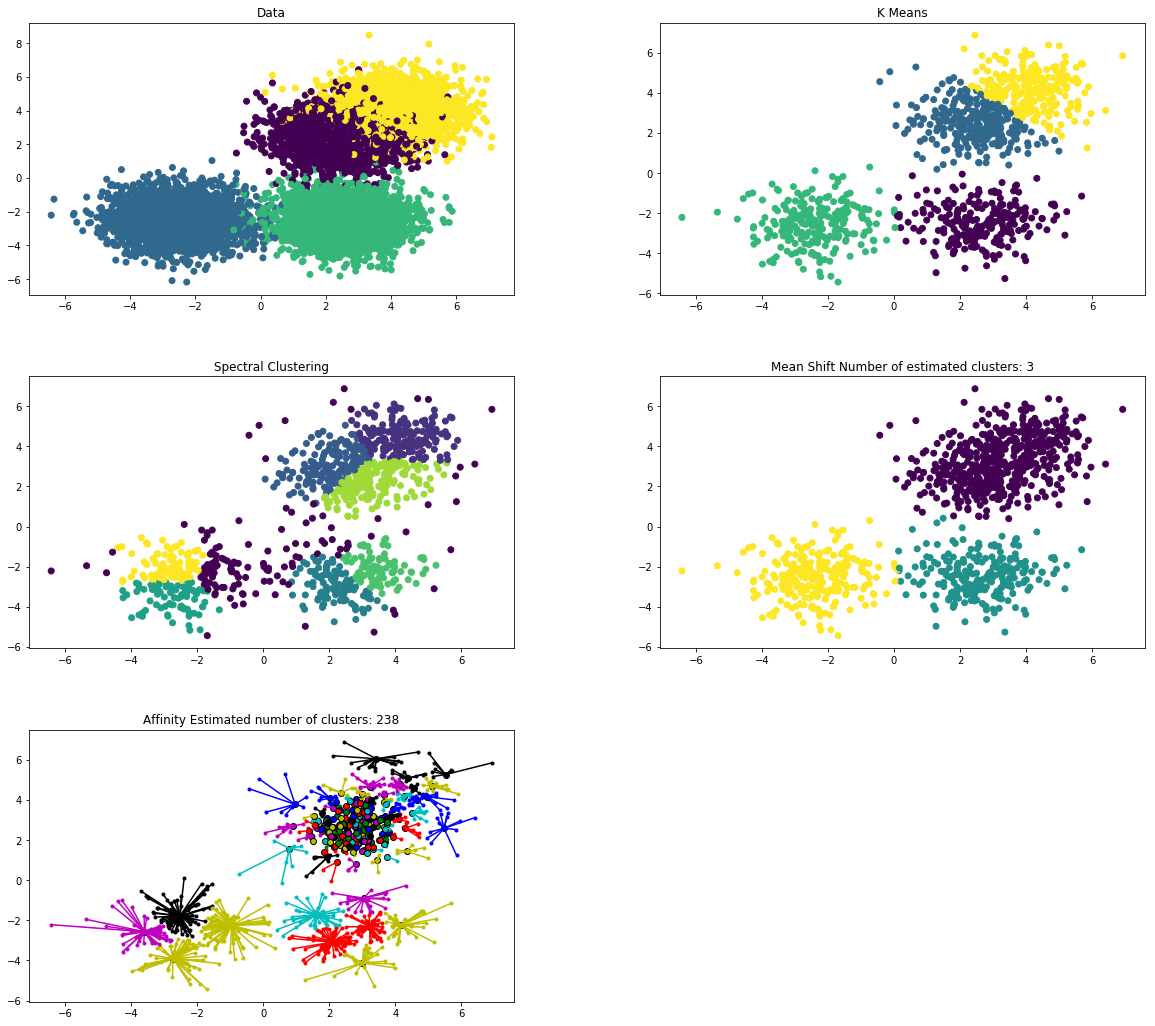

In [34]:
# The coordinates of the centers of our blobs.
centers = [[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5], [4,4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run_clustering(X,y,4)

Done


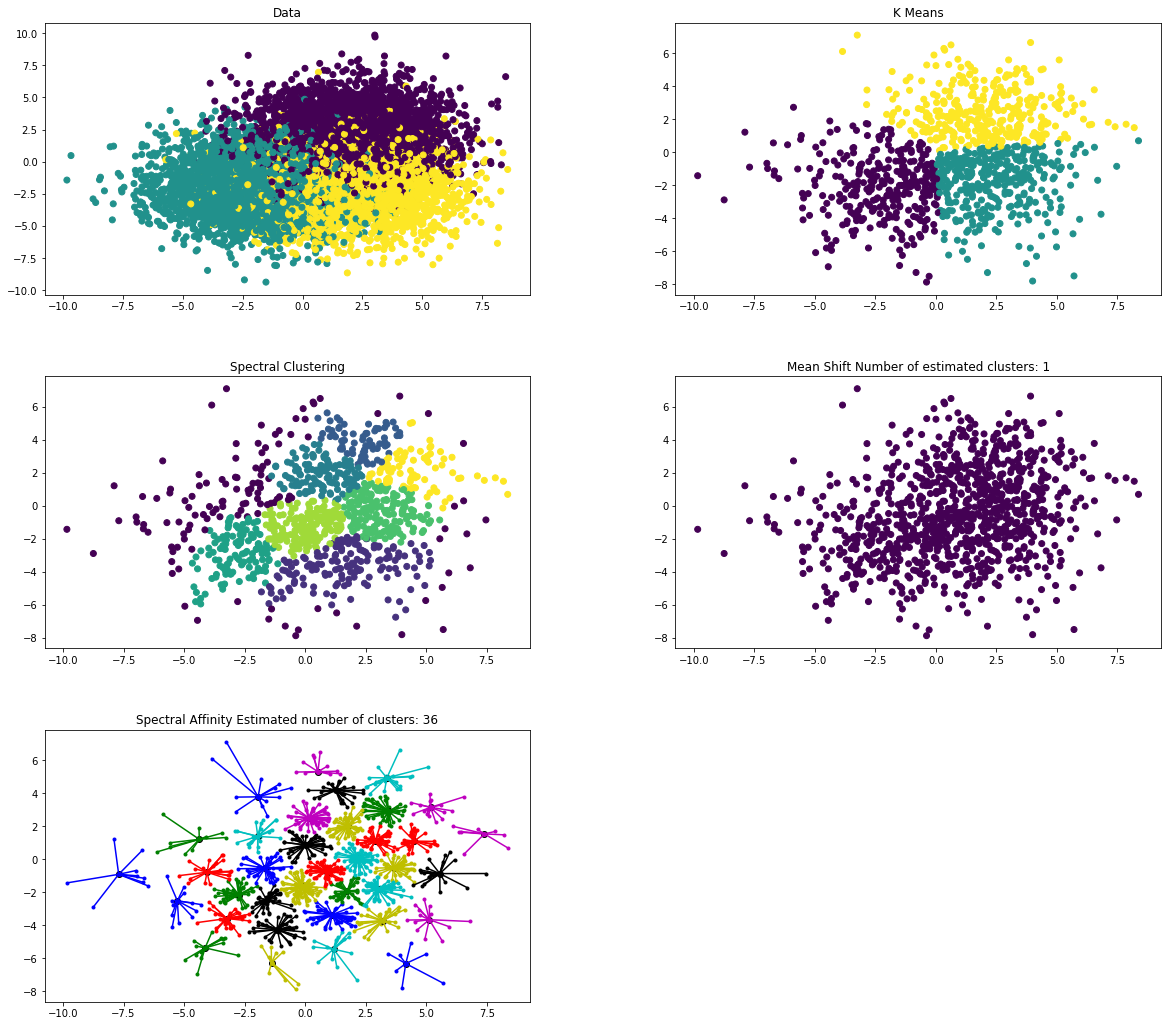

In [23]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42)
run_clustering(X,y,3)

### Increase number of blobs with some farther away

Done


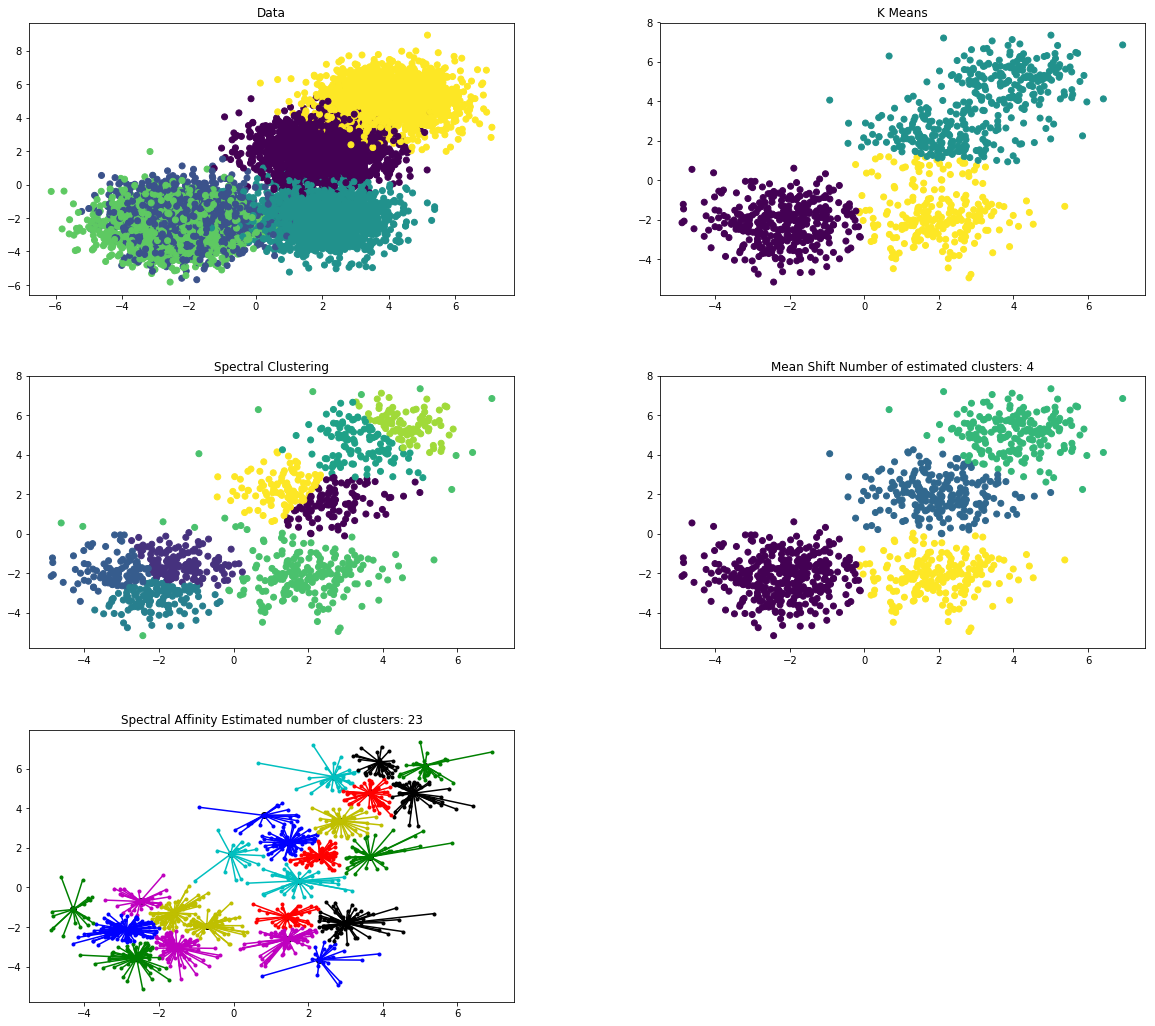

In [27]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2.5, -2.5], [4, 5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)
run_clustering(X,y,3)